### KNN-分类使用

#### 数据加载

In [2]:
from sklearn import datasets # 数据集
from sklearn.neighbors import KNeighborsClassifier # 分类

# X 表示数据，y目标值
X,y = datasets.load_iris(return_X_y=True)


In [15]:
X.shape

(150, 4)

#### 数据拆分

In [16]:
# train训练数据，test 测试数据
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,# 拆分数据
                 test_size = 0.2, # 拆分比例，测试数据20% 30个样本
                 random_state=1024) # 固定了随机状态
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

#### 算法建模

In [17]:
model = KNeighborsClassifier(n_neighbors=5) # 给定5个邻居
model.fit(X_train,y_train) # 建模、拟合、训练

KNeighborsClassifier()

#### 算法预测

In [18]:
y_ = model.predict(X_test)
y_ # 预测值

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 2])

In [19]:
print('保留测试数据，真实值是：\n',y_test)

保留测试数据，真实值是：
 [1 0 2 2 0 0 1 2 1 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 2 1 2 2 2 2]


In [21]:
# 准确率
(y_ == y_test).mean()

0.9666666666666667

In [22]:
model.score(X_test,y_test)

0.9666666666666667

### KNN-交叉验证-算法调优

#### 加载数据拆分

In [59]:
import numpy as np
from sklearn import datasets # 数据集
from sklearn.neighbors import KNeighborsClassifier # 分类

# X 表示数据，y目标值
X,y = datasets.load_iris(return_X_y=True)

# train训练数据，test 测试数据
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,# 拆分数据
                 test_size = 0.2, # 拆分比例，测试数据20% 30个样本
                 random_state=42) # 固定了随机状态
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

#### 超参数-交叉验证筛选

In [60]:
params_k = np.arange(1,31)
scores = []
for k in params_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train,y_train,cv = 5,scoring='accuracy').mean()
    scores.append(score)
display(scores)

[0.95,
 0.95,
 0.9583333333333334,
 0.95,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.95,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.9416666666666667,
 0.95,
 0.925,
 0.9333333333333333,
 0.9166666666666667,
 0.9416666666666667,
 0.9333333333333333,
 0.9416666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9166666666666667]

In [62]:
k_best = np.argmax(scores) + 1
print('得分最高的超参数k值是：',k_best)

得分最高的超参数k值是： 3


#### 选择最佳超参数建模和预测

In [63]:
estimator = KNeighborsClassifier(n_neighbors=k_best)

estimator.fit(X_train,y_train) # 建模

y_ = estimator.predict(X_test) # 预测结果
print('真实类别是：\n',y_test)
print('预测类别是：\n',y_)

真实类别是：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
预测类别是：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [64]:
estimator.score(X_test,y_test)

1.0

### KNN-回归使用

#### 数据加载

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor # 回归，平均值，计算房价中位数

data = load_boston()
X = data.data
y = data.target
display(X.shape,y.shape)

(506, 13)

(506,)

#### 数据拆分

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(404, 13)

#### 交叉验证-超参数筛选

In [80]:
from sklearn.model_selection import GridSearchCV # 网格搜索，CV 交叉验证

# k值、weights权重、p表示距离度量：欧式距离、曼哈顿距离

k = [1,3,5,7,9,15,17,23,30]
weights = ['uniform', 'distance']
p = [1,2]

params = dict(n_neighbors = k,weights = weights,p = p)

estimator = KNeighborsRegressor()

gCV = GridSearchCV(estimator,params,cv = 5,scoring = 'neg_mean_squared_error')
gCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15, 17, 23, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [81]:
gCV.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [82]:
gCV.best_score_

-33.2971448976826

In [83]:
best_knn = gCV.best_estimator_
best_knn

KNeighborsRegressor(p=1, weights='distance')

#### 模型评估与预测

In [85]:
y_ = best_knn.predict(X_test).round(1)
print(y_[:20])

[24.7 31.7 15.4 27.3 17.2 25.8 19.8 15.9 19.9 20.5 23.3 19.6 12.3 21.5
 23.2 22.3 19.8 14.2 35.1 11.6]


In [87]:
print(y_test[:20])

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1]


In [88]:
from sklearn.metrics import mean_squared_error # 均方误差

In [89]:
# 越小越好
mean_squared_error(y_test,y_)

20.988627450980392

In [90]:
((y_test - y_)**2).mean()

20.988627450980392

In [92]:
np.load('./digit.npy').shape

(5000, 28, 28)

### 图片识别【实战】

#### 加载数据

In [3]:
import numpy as np
data = np.load('./digit.npy')
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [5]:
data.shape

(5000, 28, 28)

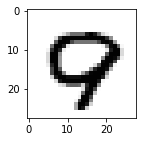

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
# 0-9,500个一组，依次是：0、1、2……
plt.imshow(data[4999],cmap = 'gray')

#### 构建目标值

In [4]:
# 一共5000个数据。每500个一组，每组依次表示0,1,2,3,4,5....9
y = list(np.arange(0,10)) * 500
y.sort()
y = np.array(y)
y

array([0, 0, 0, ..., 9, 9, 9])

#### 数据拆分与处理

In [10]:
from sklearn.model_selection import train_test_split

# arg1 表示调整后行数为 5000
# arg2 为-1，表示这一维的大小由 NumPy 自动计算，以确保总元素数量保持不变
X = data.reshape(5000,-1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=1024)


display(
    X.shape,  # (5000, 784)
    X_train.shape, # (4750, 784)
    y_train.shape  # (4750,)
)

(5000, 784)

(4750, 784)

(4750,)

#### 建模

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.952

#### 超参数优化

In [15]:
%%time
from sklearn.model_selection import GridSearchCV

params = dict(n_neighbors = [3,5,10,15,17,23,30],
              weights = ['uniform', 'distance'],
              p = [1,2])
estimator = KNeighborsClassifier()

gCV = GridSearchCV(estimator,params,cv = 5,scoring='accuracy')
gCV.fit(X_train,y_train) # 训练模型

CPU times: user 3min 27s, sys: 1.41 s, total: 3min 28s
Wall time: 3min 10s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 17, 23, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
gCV.best_score_

np.float64(0.9349473684210526)

In [17]:
gCV.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [18]:
best_model = gCV.best_estimator_
y_pred = best_model.predict(X_test)
print(y_pred[:30])

[0 7 1 7 4 2 1 1 6 5 2 0 9 6 1 6 1 2 8 9 9 6 4 8 0 5 7 6 4 0]


In [19]:
print(y_test[:30])

[0 7 1 7 4 2 1 1 6 5 2 0 9 6 1 6 1 2 8 9 9 6 4 8 0 5 7 6 4 0]


In [20]:
best_model.score(X_test,y_test)

0.956

#### 可视化

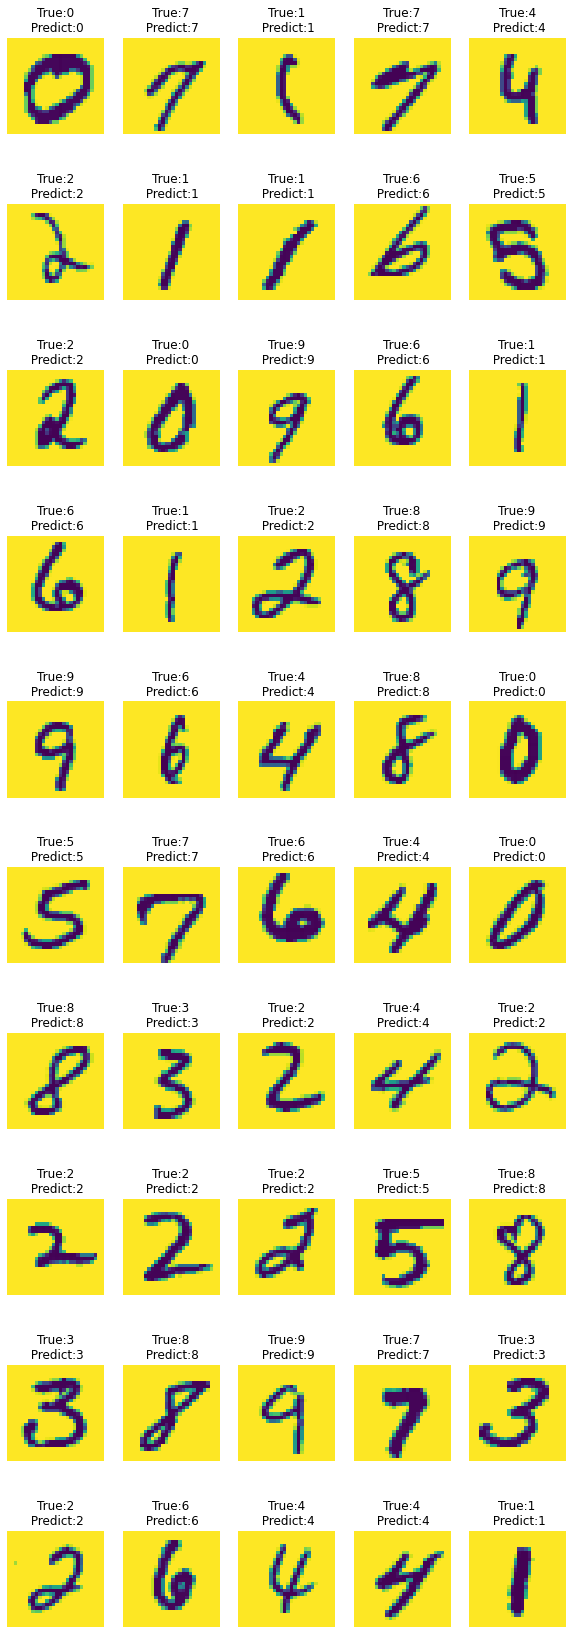

In [128]:
plt.figure(figsize=(5 * 2,10 * 3))
for i in range(50):
    plt.subplot(10,5,i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.axis('off')
    true = y_test[i]
    pred = y_pred[i]
    plt.title(f'True:{true}\n Predict:{pred}')

### 医疗健康【实战】

#### 加载数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./cancer.csv',sep='\t')
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = data['Diagnosis']
X = data.iloc[:,2:]
display(X.head(),y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,symmetry_mean,fractal_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                 random_state=1000)
display(X_train.shape,X_test.shape)

(455, 30)

(114, 30)

#### 网格搜索超参数

In [5]:
%%time
estimator = KNeighborsClassifier()

params = dict(n_neighbors = np.arange(1,30),
              weights = ['uniform', 'distance'],
              p = [1,2])

gCV = GridSearchCV(estimator,params,cv  = 6,scoring='accuracy')
gCV.fit(X_train,y_train)

CPU times: user 28.8 s, sys: 806 ms, total: 29.6 s
Wall time: 5.4 s


GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### 查看GridSearchCV最佳的参数组合

In [7]:
gCV.best_score_

np.float64(0.9758187134502925)

In [8]:
gCV.best_params_

{'n_neighbors': np.int64(5), 'p': 1, 'weights': 'distance'}

In [9]:
model = gCV.best_estimator_
model

KNeighborsClassifier(n_neighbors=np.int64(5), p=1, weights='distance')

#### 模型预测

In [10]:
y_pred = model.predict(X_test)
print('算法预测值：',y_pred[:20])

算法预测值： ['M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B']


In [11]:
print('真实数据是：',y_test[:20].values)

真实数据是： ['M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B']


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544

In [13]:
(y_test == y_pred).mean()

np.float64(0.9649122807017544)

In [14]:
model.score(X_test,y_test)

0.9649122807017544

In [34]:
gCV.score(X_test,y_test)

0.9473684210526315

#### 归一化利器

In [6]:
# 方式一
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_norm1 = mms.fit_transform(X)
X_norm1
X_train,X_test,y_train,y_test = train_test_split(X_norm1,y,test_size=0.2,
                 random_state=1000)
estimator = KNeighborsClassifier()

params = dict(n_neighbors = np.arange(1,30),
              weights = ['uniform', 'distance'],
              p = [1,2])

gCV = GridSearchCV(estimator,params,cv  = 6,scoring='accuracy')
gCV.fit(X_train,y_train) # 训练
print('超参数：',gCV.best_params_)

score = gCV.score(X_test,y_test)
print('Min-Max归一化数据，模型得分是：',score)

/Users/qiaogy/PycharmProjects/github/pyenv-3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qiaogy/PycharmProjects/github/pyenv-3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/qiaogy/PycharmProjects/github/pyenv-3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/qiaogy/PycharmProjects/github/pyenv-3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
        estimator, response_method.__name__, X, 

超参数： {'n_neighbors': np.int64(5), 'p': 1, 'weights': 'distance'}
Min-Max归一化数据，模型得分是： 0.9649122807017544


/Users/qiaogy/PycharmProjects/github/pyenv-3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan 0.94719298 0.94938596 0.94938596        nan 0.94719298
 0.9427193  0.94938596        nan 0.95827485 0.95602339 0.95602339
        nan 0.96266082 0.95599415 0.95818713        nan 0.97581871
 0.96263158 0.96263158        nan 0.96921053 0.96921053 0.96704678
        nan 0.96482456 0.97143275 0.97143275        nan 0.96921053
 0.96701754 0.97362573        nan 0.9648538  0.96923977 0.96923977
        nan 0.96701754 0.96701754 0.97362573        nan 0.96482456
 0.96923977 0.96923977        nan 0.96263158 0.96482456 0.96923977
        nan 0.95827485 0.96482456 0.96704678        nan 0.95605263
 0.96263158 0.96701754        nan 0.95605263 0.96263158 0.9648538
        nan 0.95602339 0.95599415 0.9604386         nan 0.95602339
 0.96263158 0.96263158        nan 0.95821637 0.95824561 0.96263158
        nan 0.95821

In [37]:
# 方式二
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_norm2 = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_norm2,y,test_size=0.2,
                 random_state=1000)
estimator = KNeighborsClassifier()

params = dict(n_neighbors = np.arange(1,30),
              weights = ['uniform', 'distance'],
              p = [1,2])

gCV = GridSearchCV(estimator,params,cv  = 6,scoring='accuracy')
gCV.fit(X_train,y_train) # 训练
print('超参数：',gCV.best_params_)

score = gCV.score(X_test,y_test)
print('Z-Score标准化数据，模型得分是：',score)

超参数： {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
Z-Score标准化数据，模型得分是： 0.9649122807017544


### 人力资源【实战】

#### 数据加载

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # 准确率
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder # 标签编码

In [3]:
data = pd.read_csv('./adults.txt')
display(data.head(),data.shape)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 15)

#### 数据预处理

In [4]:
# 空数据处理
data.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [5]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
data = data.replace('?',np.nan).dropna().reset_index(drop = True)
data.shape

(30162, 15)

In [11]:
# 异常值，算法建模不是好数据
data['capital_gain'].sort_values(ascending=False).unique()

array([99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481,
       15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605, 10566,
       10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,  7430,
        7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,  6097,
        5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,  4865,
        4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,  3942,
        3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,  3432,
        3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,  2964,
        2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,  2580,
        2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,  2290,
        2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,  2009,
        1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,  1409,
        1173,  1151,  1086,  1055,   991,   914,   594,   401,   114,
           0], dtype=int64)

In [12]:
data['capital_loss'].sort_values(ascending=False).unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2472,
       2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267, 2258,
       2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2149, 2129, 2080,
       2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944, 1902, 1887,
       1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740, 1735, 1726,
       1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617, 1602, 1594,
       1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408, 1380, 1340,
       1258, 1138, 1092,  974,  880,  810,  653,  625,  419,  323,  213,
        155,    0], dtype=int64)

In [13]:
cond = (data['capital_gain'] != 99999) & (data['capital_loss'] != 4356)
data = data[cond]
data.shape

(30013, 15)

In [15]:
# 字符串---> 数值型数据
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["paris", "paris", "tokyo", "amsterdam"])

array([1, 1, 2, 0])

In [18]:
columns = ['workclass','education','marital_status','occupation','relationship',
           'race','sex','native_country']
le = LabelEncoder()
for col in columns:
    data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [22]:
# 归一化，最大值最小值归一化
scaler = MinMaxScaler()
col_norm = ['age','final_weight','workclass','education_num','education','marital_status','occupation',
            'relationship','race','capital_gain','capital_loss','hours_per_week','native_country']
data[col_norm] = scaler.fit_transform(data[col_norm])
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.301370,0.833333,0.043338,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1,0.052626,0.0,0.397959,0.95,<=50K
1,0.452055,0.666667,0.047277,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1,0.000000,0.0,0.122449,0.95,<=50K
2,0.287671,0.333333,0.137244,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1,0.000000,0.0,0.397959,0.95,<=50K
3,0.493151,0.333333,0.150212,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1,0.000000,0.0,0.397959,0.95,<=50K
4,0.150685,0.333333,0.220703,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0,0.000000,0.0,0.397959,0.10,<=50K


#### 数据拆分

In [23]:
y = data['salary']
X = data.drop(labels='salary',axis = 1)
X.shape

(30013, 14)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1024)


#### 建模预测

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('真实值：',y_test[:20].values)
print('预测值：',y_pred[:20])

真实值： ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K'
 '>50K' '<=50K']
预测值： ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K'
 '>50K' '<=50K']


In [26]:
accuracy_score(y_test,y_pred)

0.8204231217724471

#### 模型调优

In [27]:
%%time
knn = KNeighborsClassifier()

params = dict(n_neighbors = [3,5,9,15,23,31,39],
              weights =['uniform', 'distance'] ,p = [1,2])

gCV = GridSearchCV(knn,params,cv = 5)
gCV.fit(X_train,y_train)

CPU times: total: 1min 1s
Wall time: 1min 1s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 15, 23, 31, 39], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [28]:
gCV.best_params_

{'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}

In [29]:
knn_best = gCV.best_estimator_
knn_best.score(X_test,y_test)

0.834416125270698

In [30]:
gCV.score(X_test,y_test)

0.834416125270698